In [1]:
# from google.colab import drive
# drive.mount('/content/drive')


In [2]:
# !pip install tabpfn
# !pip  install shap

In [3]:
import pandas as pd
index_columns = ["Unit", "Cycle"]
settings_columns = ["setting" + str(i + 1) for i in range(3)]
sensor_columns = ["s" + str(i + 1) for i in range(21)]
final_columns = index_columns + settings_columns + sensor_columns
df_spark = pd.read_csv('E:/IAD/Intern/05_CMAPSS/CMAPSSData/train_FD002.txt', header=None, sep=" ")
df_spark = df_spark[df_spark.columns[0:26]]
df_spark.columns = final_columns
df_spark.head()

,Unit,Cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,8.00,194.64,2222.65,8341.91,1.02,42.02,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,5.71,138.51,2211.57,8303.96,1.02,42.20,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,9.02,175.71,1915.11,8001.42,0.94,36.69,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,5.71,138.46,2211.58,8303.96,1.02,41.96,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,9.03,175.05,1915.10,7993.23,0.94,36.89,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286


In [4]:
df_spark.columns

Index(['Unit', 'Cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
       's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
       's15', 's16', 's17', 's18', 's19', 's20', 's21'],
      dtype='object')

In [5]:
# !pip install -U pytorch_tabular

In [6]:
# from pytorch_tabular import TabularModel
# from pytorch_tabular.models import (
#     CategoryEmbeddingModelConfig,
#     FTTransformerConfig,
#     TabNetModelConfig,
#     GatedAdditiveTreeEnsembleConfig,
#     TabTransformerConfig,
#     AutoIntConfig
# )
# from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig, ExperimentConfig
# from pytorch_tabular.models.common.heads import LinearHeadConfig

In [7]:
import numpy as np
import pandas as pd
# from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, log_loss

In [8]:
cat_cols = []
num_cols = ['Unit','Cycle','setting1','setting2','setting3','s1', 's2', 's3', 's4', 's5', 's6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']
target = ['RUL']

In [9]:
train, test = train_test_split(df_spark, stratify=df_spark['s1'], test_size=0.2, random_state=42)

In [10]:
train.shape, test.shape

((43007, 26), (10752, 26))

In [11]:
train.head()

,Unit,Cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
40192,194,119,35.0026,0.8406,100.0,449.44,556.35,1367.65,1133.60,5.48,8.00,193.52,2222.64,8339.64,1.02,42.21,182.72,2387.71,8048.46,9.3976,0.02,334,2223,100.0,14.86,8.8031
51144,249,58,34.9998,0.8400,100.0,449.44,555.55,1358.81,1124.97,5.48,8.00,194.55,2222.93,8339.90,1.02,41.78,183.19,2387.99,8066.54,9.2911,0.02,333,2223,100.0,15.04,9.0177
46907,228,188,35.0067,0.8406,100.0,449.44,556.27,1367.92,1131.97,5.48,8.00,194.52,2223.09,8356.43,1.02,41.99,183.04,2388.18,8067.87,9.3143,0.02,334,2223,100.0,15.05,8.7817
32949,158,133,42.0078,0.8411,100.0,445.00,549.54,1347.83,1125.60,3.91,5.71,139.53,2211.83,8309.79,1.02,42.00,130.71,2387.87,8084.54,9.3484,0.02,330,2212,100.0,10.47,6.3384
52549,255,267,9.9994,0.2500,100.0,489.05,604.91,1510.59,1311.45,10.52,15.50,394.16,2319.01,8786.28,1.26,45.41,371.80,2388.23,8135.35,8.6800,0.03,371,2319,100.0,28.43,17.0462


In [12]:
# !pip install tabpfn
# !pip install shap
# !pip install -U pytorch_tabular

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, log_loss
from lightgbm import LGBMRegressor
from sklearn.preprocessing import OrdinalEncoder
import pickle
# from sklearn.metrics import (
#     accuracy_score,
#     confusion_matrix,
#     precision_score,
#     recall_score,
#     f1_score,
#     classification_report,
#     ConfusionMatrixDisplay
# )
import matplotlib.pyplot as plt

df_spark = pd.read_csv('E:/IAD/Intern/05_CMAPSS/CMAPSSData/train_FD002.txt', sep=' ', header=None)

column_names = ['unit', 'cycle', 'setting1', 'setting2', 'setting3'] + [f'sensor{i}' for i in range(1, 24)]
df_spark.columns = column_names

max_cycle = df_spark.groupby('unit')['cycle'].max()
df_spark['RUL'] = df_spark.apply(lambda row: max_cycle[row['unit']] - row['cycle'], axis=1)

print(df_spark.head())

features = df_spark.columns.difference(['unit', 'cycle', 'RUL'])
target = ['RUL']

train, test = train_test_split(df_spark, test_size=0.2, random_state=42)

cat_cols = ['unit']
train_enc = train.copy()
test_enc = test.copy()

for col in cat_cols:
    enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=np.nan)
    train_enc[col] = enc.fit_transform(train_enc[col].values.reshape(-1,1))
    test_enc[col] = enc.transform(test_enc[col].values.reshape(-1,1))


model = LGBMRegressor(random_state=42)
model.fit(train_enc[features], train_enc[target[0]])

test_pred = model.predict(test_enc[features])

mse = np.mean((test_enc[target[0]].values - test_pred) ** 2)
print(f"Mean Squared Error: {mse}")

# lưu và tải lại model
with open('E:/IAD/Intern/05_CMAPSS/source/lgbm_cmapss_FD002.sav', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('E:/IAD/Intern/05_CMAPSS/source/lgbm_cmapss_FD002.sav', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

   unit  cycle  setting1  setting2  ...  sensor21  sensor22  sensor23    RUL
0     1      1   34.9983    0.8400  ...    8.8071       NaN       NaN  148.0
1     1      2   41.9982    0.8408  ...    6.2665       NaN       NaN  147.0
2     1      3   24.9988    0.6218  ...    8.6723       NaN       NaN  146.0
3     1      4   42.0077    0.8416  ...    6.4701       NaN       NaN  145.0
4     1      5   25.0005    0.6203  ...    8.5286       NaN       NaN  144.0

[5 rows x 29 columns]
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003886 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3769
[LightGBM] [Info] Number of data points in the train set: 43007, number of used features: 24
[LightGBM] [Info] Start training from score 108.245262
Mean Squared Error: 1860.6484688168725


Mean Squared Error (MSE): 1860.6484688168725
Root Mean Squared Error (RMSE): 43.13523465586889
Mean Absolute Error (MAE): 31.771797073905915
   Actual RUL  Predicted RUL
0       191.0     166.081469
1       250.0     136.806748
2        49.0      47.871315
3        25.0      34.931131
4       108.0     120.253168
5        97.0      66.913105
6        95.0      55.661367
7         2.0      11.341045
8       115.0     144.021774
9        40.0      27.507488


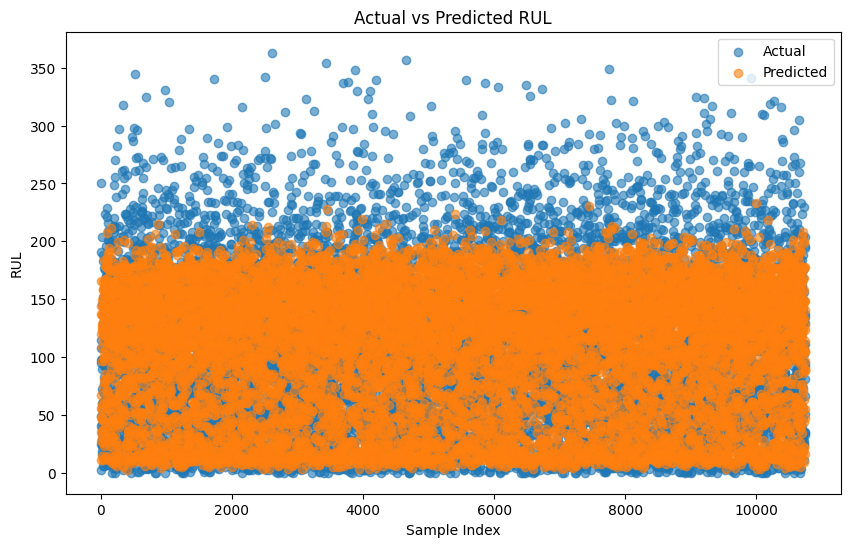

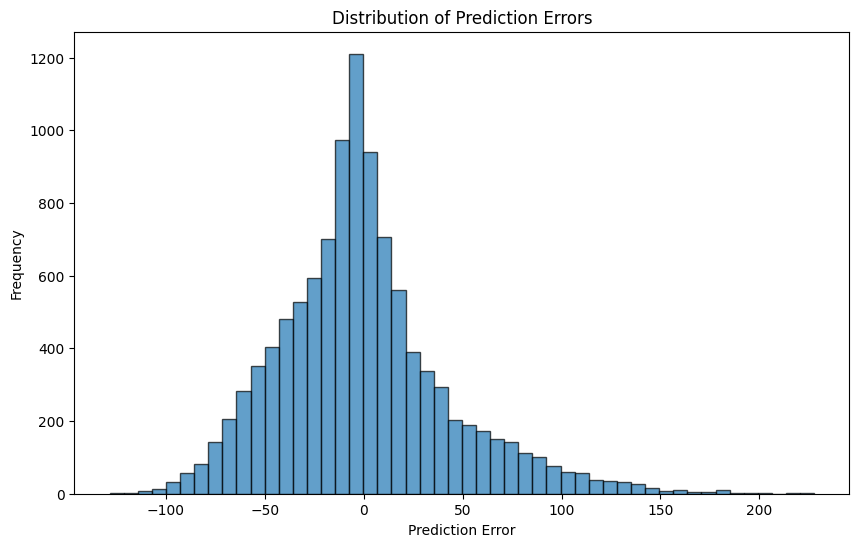

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

test_pred = loaded_model.predict(test_enc[features])

mse = mean_squared_error(test_enc[target[0]], test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_enc[target[0]], test_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

comparison_df = pd.DataFrame({
    'Actual RUL': test_enc[target[0]].values,
    'Predicted RUL': test_pred
})

print(comparison_df.head(10))

plt.figure(figsize=(10, 6))
plt.scatter(range(len(test_enc)), test_enc[target[0]], label='Actual', alpha=0.6)
plt.scatter(range(len(test_enc)), test_pred, label='Predicted', alpha=0.6)
plt.title('Actual vs Predicted RUL')
plt.xlabel('Sample Index')
plt.ylabel('RUL')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
errors = test_enc[target[0]].values - test_pred
plt.hist(errors, bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()

In [16]:
from sklearn.preprocessing import MinMaxScaler

max_cycles = df_spark.groupby('unit')['cycle'].max()
df_spark['RUL'] = df_spark.apply(lambda row: max_cycles[row['unit']] - row['cycle'], axis=1)

train, test = train_test_split(df_spark, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train.iloc[:, 2:25])
test_scaled = scaler.transform(test.iloc[:, 2:25])

X_train, y_train = train_scaled, train['RUL']
X_test, y_test = test_scaled, test['RUL']

In [17]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

model = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003067 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3506
[LightGBM] [Info] Number of data points in the train set: 43007, number of used features: 23
[LightGBM] [Info] Start training from score 108.245262
Mean Squared Error: 1860.13


In [21]:
print(X_train.shape)
print(type(X_train))

(43007, 23)
<class 'numpy.ndarray'>


 97%|=================== | 10450/10752 [00:28<00:00]       

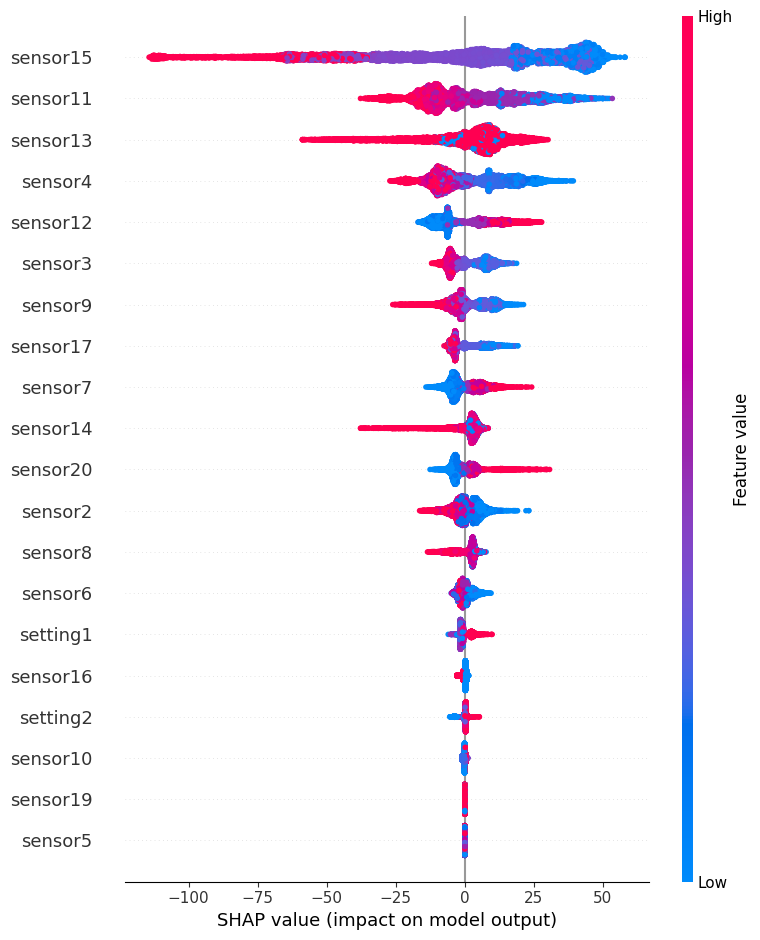

In [18]:
import shap

explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test, check_additivity=False)

shap.summary_plot(shap_values, X_test, feature_names=column_names[2:25])